In [1]:
pip install matplotlib opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 660.6 kB/s eta 0:00:59
   ---------------------------------------- 0.1/38.6 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.2/38.6 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.3/38.6 MB 1.5 MB/s eta 0:00:25
   ---------------------------------------- 0.4/38.6 MB 1.7 MB/s eta 0:00:23
    --------------------------------------- 0.5/38.6 MB 1.8 MB/s eta 0:00:21
    --------------------------------------- 0.6/38.6 MB 1.9 MB/s eta 0:00:20
    --------------------------------------- 0.8/38.6 MB 1.9 MB/s eta 0:00:20
    --------------------------------------- 0.8/38.6 MB 2.0 MB/s eta 0:00:20
    --------------------------------------- 0.9/38.6 MB 2.0 MB/s eta 0:00:19
   - -------------------------------------- 1.0/38.6 MB 2.1 MB/s eta 0:00:19
   - -------------------------------------- 1.2/38.6 MB 2.1 MB/s eta 0:00:18
   -

C:\Users\D.Nivetha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\D.Nivetha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step  


C:\Users\D.Nivetha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch: 0, Discriminator Loss: 0.6714475154876709, Generator Loss: 0.6545630097389221
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/

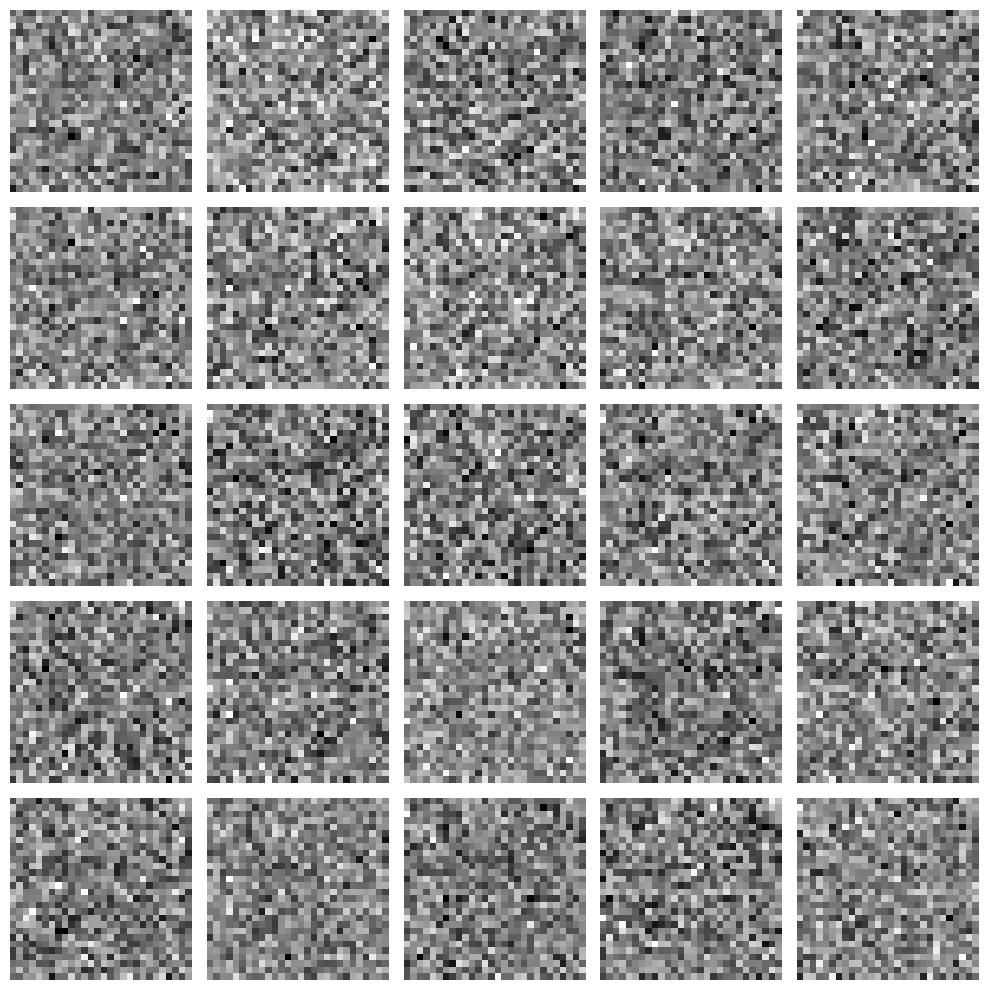

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input


# Load the MNIST dataset
(X_train, _), (_, _) = mnist.load_data()

# Normalize data
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = X_train.reshape(-1, 28, 28)

# Define the generator network
generator = Sequential([
    Dense(256, input_dim=100),
    LeakyReLU(0.2),
    BatchNormalization(),
    Dense(512),
    LeakyReLU(0.2),
    BatchNormalization(),
    Dense(1024),
    LeakyReLU(0.2),
    BatchNormalization(),
    Dense(784, activation='tanh'),
    Reshape((28, 28))
])

# Define the discriminator network
discriminator = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512),
    LeakyReLU(0.2),
    Dense(256),
    LeakyReLU(0.2),
    Dense(1, activation='sigmoid')
])

# Compile discriminator
discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])

# Combine generator and discriminator to form GAN
discriminator.trainable = False
gan_input = Input(shape=(100,))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)
gan.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

# Training loop
batch_size = 64
epochs = 1000

for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_images = X_train[idx]
    noise = np.random.normal(0, 1, (batch_size, 100))
    fake_images = generator.predict(noise)
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # Train generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    valid_labels = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, valid_labels)
    
    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}")
    
    # Save generated images
    if epoch % 1000 == 0:
        noise = np.random.normal(0, 1, (25, 100))
        generated_images = generator.predict(noise)
        generated_images = generated_images.reshape(-1, 28, 28)
        plt.figure(figsize=(10, 10))
        for i in range(generated_images.shape[0]):
            plt.subplot(5, 5, i+1)
            plt.imshow(generated_images[i], cmap='gray')
            plt.axis('off')
        plt.tight_layout()
        plt.savefig(f'generated_image_{epoch}.png')

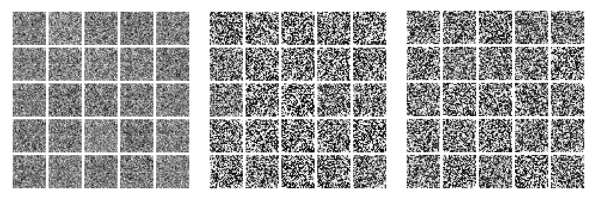

In [2]:
import matplotlib.pyplot as plt
import cv2
import os

# Directory containing generated images
image_directory = "."

# Load and display generated images
generated_image_files = [file for file in os.listdir(image_directory) if file.startswith("generated_image_")]
num_images = len(generated_image_files)

plt.figure(figsize=(10, 10))
for i, image_file in enumerate(generated_image_files):
    image_path = os.path.join(image_directory, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(5, 5, i+1)
    plt.imshow(image)
    plt.axis('off')
plt.tight_layout()
plt.show()
